In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


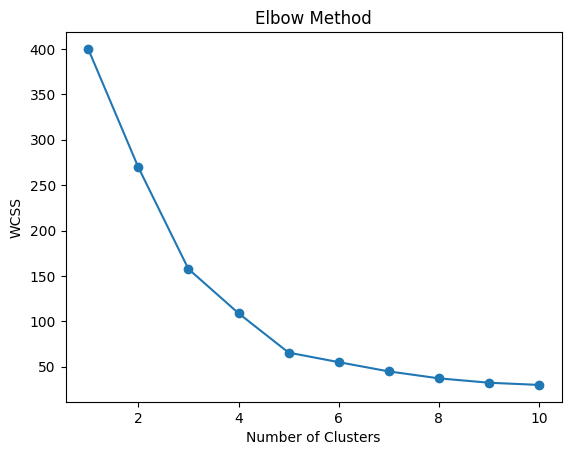

In [7]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.savefig("elbow_plot.png")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels


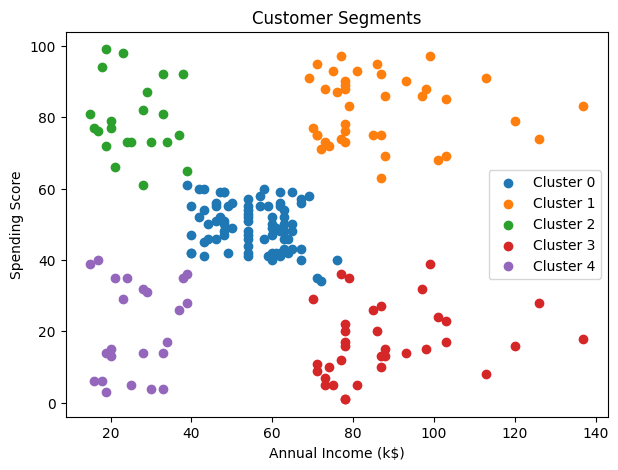

In [9]:
plt.figure(figsize=(7,5))

for i in range(5):
    plt.scatter(
        df[df['Cluster']==i]['Annual Income (k$)'],
        df[df['Cluster']==i]['Spending Score (1-100)'],
        label=f"Cluster {i}"
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.legend()
plt.savefig("clusters.png")
plt.show()


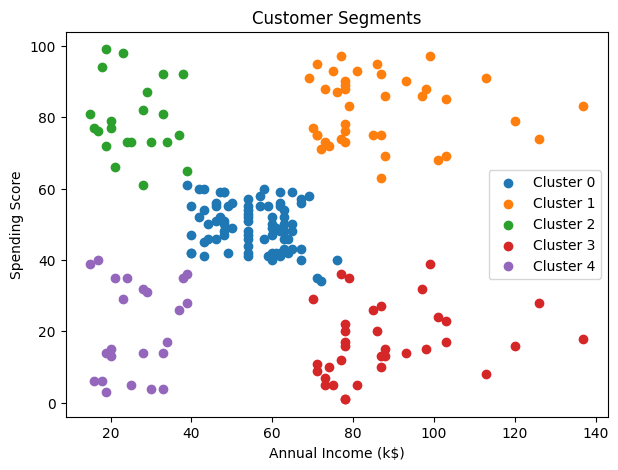

In [10]:
plt.figure(figsize=(7,5))

for i in range(5):
    plt.scatter(
        df[df['Cluster']==i]['Annual Income (k$)'],
        df[df['Cluster']==i]['Spending Score (1-100)'],
        label=f"Cluster {i}"
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.legend()
plt.savefig("clusters.png")
plt.show()


In [11]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

with open("silhouette_score.txt","w") as f:
    f.write(str(score))


Silhouette Score: 0.5546571631111091
